<!--<div align="center">Семинар № 2-->

<div align="center"><font color=#4682B4 size=4 face=
                          "arial black"><em><strong>Промежуточная аттестация</strong></em></font></div>

<div class="alert alert-block alert-info"><em>
<b>Задача.</b><br>
Проанализируйте результаты эксперимента и напишите свои рекомендации менеджеру.<br>
</em></div>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn

In [2]:
df = pd.read_excel('Results_А_B.xlsx')
df.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,0,0
1,337,gate_30,38,1,0
2,377,gate_40,165,1,0
3,483,gate_40,1,0,0
4,488,gate_40,179,1,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90189 entries, 0 to 90188
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   userid          90189 non-null  int64 
 1   version         90189 non-null  object
 2   sum_gamerounds  90189 non-null  int64 
 3   retention_1     90189 non-null  int64 
 4   retention_7     90189 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 3.1+ MB


In [4]:
df.describe()

,userid,sum_gamerounds,retention_1,retention_7
count,9.018900e+04,90189.000000,90189.000000,90189.000000
mean,4.998412e+06,51.872457,0.445210,0.186065
std,2.883286e+06,195.050858,0.496992,0.389161
min,1.160000e+02,0.000000,0.000000,0.000000
25%,2.512230e+06,5.000000,0.000000,0.000000
50%,4.995815e+06,16.000000,0.000000,0.000000
75%,7.496452e+06,51.000000,1.000000,0.000000
max,9.999861e+06,49854.000000,1.000000,1.000000


In [5]:
n = df.shape[0]
print(f'Общее количество неуникальных ID:  {n - df.userid.nunique()}.')

Общее количество неуникальных ID:  0.


 <font color='LimeGreen' size=3 >
 1. 90 189 строк;<br>
 2. пропущенных значений нет; <br>
 3. все значения в столбце <b>'userid'</b> уникальны;</font>

### Очистим данные

Примем, что на одну попытку приходится 1,5 минуты, тогда,играя по 12 часов в сутки, максимальное количество уровней, которые игрок может пройти за 14 дней и за 1 день :

In [6]:
60/1.5 * 12 * 14, 60/1.5 * 12


(6720.0, 480.0)

Удалим строки с большими значениями:

In [7]:
dd_d = df[df['sum_gamerounds'] > 6720]
dd_d

,userid,version,sum_gamerounds,retention_1,retention_7
57702,6390605,gate_30,49854,0,1


In [8]:
df['retention_sum'] = df.retention_1 + df.retention_7

In [9]:
dd_w = df[(df['sum_gamerounds'] > 480) & (df['retention_sum'] == 0)]
dd_w

,userid,version,sum_gamerounds,retention_1,retention_7,retention_sum
80248,8882901,gate_40,547,0,0,0
82889,9183105,gate_30,981,0,0,0
83044,9200736,gate_30,829,0,0,0


In [10]:
list(dd_d.userid) + list(dd_w.userid)

[6390605, 8882901, 9183105, 9200736]

In [11]:
val = list(dd_d.userid) + list(dd_w.userid)
df_cl = df[df.userid.isin(val) == False]
ncl = df_cl.shape[0]
ncl

90185

Совсем неигравшие пользователи.

In [12]:
n0 = df[df['sum_gamerounds'] == 0].count()[0]
print(f'Количество пользователей, не сыгравших ни одного раунда: {n0} или {n0 / n * 100:.1f} %.')

Количество пользователей, не сыгравших ни одного раунда: 3994 или 4.4 %.


<font color='LimeGreen' size=3 >4. Количество пользователей, 
не сыгравших ни одного раунда: <b>3994</b> или <b>4.4 %</b>.</font>

Удалим их.

In [13]:
df_cl = df_cl[df_cl['sum_gamerounds'] != 0]
ncl = df_cl.shape[0]
print(f'Число записей после очистки :  {ncl}.')

Число записей после очистки :  86191.


***

Разделим данные на группы и посмотрим на их распределение по полю **'sum_gamerounds'**:

In [14]:
df30 = df_cl[df_cl['version'] == 'gate_30']
df40 = df_cl[df_cl['version'] == 'gate_40']
n_30 = df30.shape[0]
n_40 = df40.shape[0]
print(f' Количество записей в группах сопостовимо:\n  контрольная - {n_30};\n     тестовая - {n_40}.')

 Количество записей в группах сопостовимо:
  контрольная - 42760;
     тестовая - 43431.


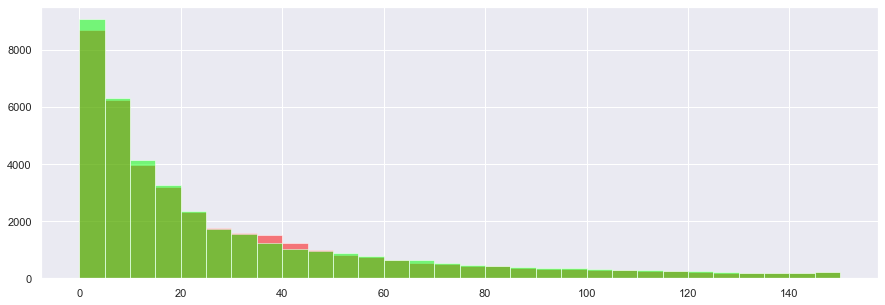

In [15]:
sbn.set(rc = {'figure.figsize':(15, 5)})
bins = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100,
        105, 110, 115, 120, 125, 130, 135, 140, 145, 150]
plt.hist(df30.sum_gamerounds, color='red', alpha=0.5, bins=bins)
plt.hist(df40.sum_gamerounds, color='lime', alpha=0.5, bins=bins)
plt.show()

Визуально понятно, что данные соответствуют распределению Пуассона. Данные верные. Распределение по группам похоже.

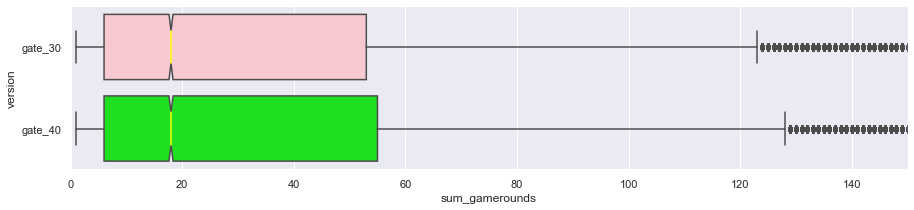

In [16]:
sbn.set(rc = {'figure.figsize':(15, 3)})
sbn.boxplot(data=df_cl, x='sum_gamerounds', y='version', palette=["pink", "lime"], notch=True,\
            medianprops={"color": "yellow"}).set_xlim(left=0, right=150);

In [17]:
import scipy.stats as st
st.kstest(df30.sum_gamerounds, df40.sum_gamerounds)

KstestResult(statistic=0.009841013903347795, pvalue=0.030600692069887137)

На диаграмме размаха видно небольшое увеличение раундов в тестовых данных по сравнению с контрольной группой. Тест Колмогорова-Смирнова подтверждает, что эта разница статистически значима: **pvalue < 5 %**.

***

In [18]:
df_x00 = df[df["retention_sum"] == 0]
n_x00 = df_x00["userid"].count()
print(f'Не вернулись, всего  : {n_x00} или {n_x00 / n * 100:.1f} %')

Не вернулись, всего  : 46437 или 51.5 %


<font color='LimeGreen' size=3>5. Количество пользователей, 
не вернувшихся совсем: <b>46 437</b> или <b>51,5 %</b>.</font>

***

In [19]:
gr30_1 = df30.groupby(['retention_1']).agg({'userid':'count'})
gr30_1['conv_%_30'] = gr30_1['userid'] / n_30 * 100  # Конверсия одного дня контрольной группы
gr30_1.index.names = ['ret_1d_30']
gr30_1.columns = ['all_30', 'conv_%_30']

gr40_1 = df40.groupby(['retention_1']).agg({'userid':'count'})
gr40_1['conv_%_40'] = gr40_1['userid'] / n_40 * 100  # Конверсия одного дня тестовой группы
gr40_1.index.names = ['ret_1d_40']
gr40_1.columns = ['all_40', 'conv_%_40']

gr30_1.round(2)

,all_30,conv_%_30
ret_1d_30,,
0,22767,53.24
1,19993,46.76


In [20]:
gr40_1.round(2)

,all_40,conv_%_40
ret_1d_40,,
0,23358,53.78
1,20073,46.22


In [21]:
from statsmodels.stats.proportion import proportions_ztest
s1, pv1 = proportions_ztest(count=20073, nobs=n_40, value=.4676)
print(f'p-value = {pv1 * 100} %')

p-value = 2.3514161935063282 %


<font color='LimeGreen' size=3>6. Ухудшение конверсии одного дня для тестовой группы статистически значимо: <b> p-value \< 5\% </b>.</font>

In [22]:
gr30_7 = df30.groupby(['retention_7']).agg({'userid':'count'})
gr30_7['conv_%_30'] = gr30_7['userid'] / n_30 * 100  # Конверсия семи дней контрольной группы
gr30_7.index.names = ['ret_7d_30']
gr30_7.columns = ['all_30', 'conv_%_30']

gr40_7 = df40.groupby(['retention_7']).agg({'userid':'count'})
gr40_7['conv_%_40'] = gr40_7['userid'] / n_40 * 100  # Конверсия семи дней тестовой группы
gr40_7.index.names = ['ret_7d_40']
gr40_7.columns = ['all_40', 'conv_%_40']

gr30_7.round(2)

,all_30,conv_%_30
ret_7d_30,,
0,34275,80.16
1,8485,19.84


In [23]:
gr40_7.round(2)

,all_40,conv_%_40
ret_7d_40,,
0,35165,80.97
1,8266,19.03


In [24]:
s7, pv7 = proportions_ztest(count=8266, nobs=n_40, value=.1984)
print(f'p-value = {pv7 * 100} %')

p-value = 0.0018116614119174318 %


<font color='LimeGreen' size=3>7. Ухудшение конверсии семи дней для тестовой группы статистически значимо: <b>p-value < 5%</b>.</font>

<div class="alert alert-block alert-success"><em>
Тест проведён качественно, данные статистически достоверны, пропуски отсутствуют, количество выбросов небольшое ( п. 2. ниже).<br>   
С достовеностью 95 % для удержания 1 дня и 99 % для удержания 7 дней<br> 
    проведённый тест показал <b>ухудшение</b> результатов.<br><br>  
<b>Рекомендации менеджеру :</b><br>    
1. Перенесение неких "ворот" с 30-го уровня на 40-й <b>НЕ РЕКОМЕНДУЕТСЯ</b> .<br>
2. Есть вопросы по достоверности рассчётов значений по полю 'sum_gamerounds', не понятна методика рассчёта, возможно они верны.<br>    
3. Рекомендуется добавить поле для значений максимального уровня до которого дошёл пользователь.<br>   4. Более половины пользователей ( 51,5 %) не возвращаются вообще.<br> 
5. 4,4 % или 3994 не пршли ни одного уровня.<br><br>  
Неоходим анализ результатов в пп. 4. и 5.
</em></div>

***